In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Индивидуальные параметры, фукнции

In [5]:
# Подсчитано аналитически
A = 2. / np.pi

In [6]:
# Плотность распределения
def f_small(l):
    return A / (l**2 + 1)

In [7]:
# Функция распределения
def F_big(l):
    return A * np.arctan(l)

In [8]:
# Обратная к F_big. [0, 1] -> [0, +inf]
def F_inv(r):
    return np.tan(r/A)

In [75]:
M = 10000
# N_list = np.array([100, 1000, 10000, 100000])
N_list = np.logspace(2, 5, 10).astype(int)

In [76]:
dirs = np.array([[0, 1], [1, 0], [0, -1], [-1, 0]])

### Моделирование

In [77]:
init_vals = np.zeros((2,M))
last_vals = np.zeros((len(N_list), 2, M))

In [78]:
for i, N in enumerate(N_list):
    curr_vals = init_vals.copy()
    for j in tqdm(range(N)):
        curr_l = F_inv(np.random.uniform(0, 1, size=M))
        curr_dirs = dirs[np.random.randint(0,4, size=M)].T
        curr_vals += curr_l * curr_dirs
        # assert curr_vals.shape == (2, M)
    last_vals[i] = curr_vals

100%|██████████| 100000/100000 [01:22<00:00, 1218.46it/s]


### Полученные распределения

In [79]:
ax_lim = 1e6

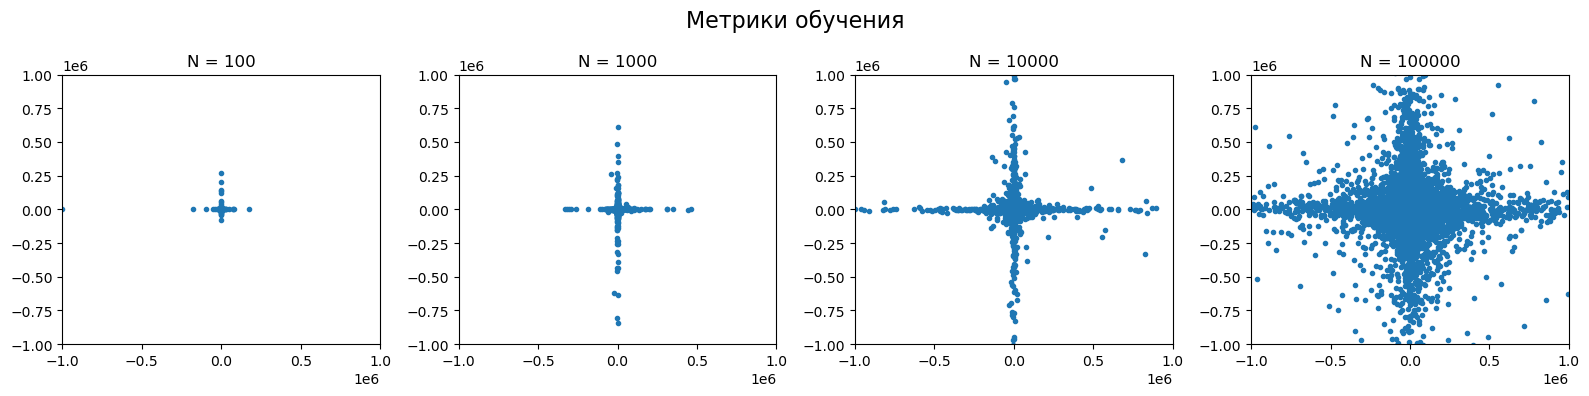

In [84]:
plt.figure(figsize=(4*len(N_list[::3]), 4))
plt.suptitle('Метрики обучения', fontsize=16)
for i, N in enumerate(N_list[::3]):
    plt.subplot(1, len(N_list[::3]), 1 + i)
    plt.title(f'N = {N}')
    plt.plot(last_vals[3*i,0,:], last_vals[3*i,1,:], '.')
    plt.xlim(-ax_lim,ax_lim)
    plt.ylim(-ax_lim,ax_lim)
plt.tight_layout()
plt.show()

### Рассчёт параметров полученных распределений

In [81]:
mean_vals = last_vals.mean(axis=2)
sq_mean_vals = (mean_vals**2)
r_vals = sq_mean_vals.sum(axis=1)**0.5
mean_sq_vals = (last_vals**2).mean(axis=2)
var_vals = last_vals.var(axis=2)
full_var_vals = var_vals.sum(axis=1)

In [82]:
for i, N in enumerate(N_list):
    print(f'----------N={N}----------')
    print(f'<x> = {mean_vals[i,0]},\t<y> = {mean_vals[i,1]}')
    print(f'<R> = {r_vals[i]}')
    print(f'<x^2> = {mean_sq_vals[i,0]},\t<y^2> = {mean_sq_vals[i,1]}')
    print(f'<Δx^2> = {var_vals[i,0]},\t<Δy^2> = {var_vals[i,1]}')
    print(f'<ΔR^2> = {full_var_vals[i]}')

----------N=100----------
<x> = -92.47584251251729,	<y> = 93.36768659870519
<R> = 131.41273282750774
<x^2> = 110463722.526048,	<y^2> = 19427466.544975244
<Δx^2> = 110455170.74459958,	<Δy^2> = 19418749.02007445
<ΔR^2> = 129873919.76467404
----------N=215----------
<x> = 307.55482930445487,	<y> = 37.22911554293635
<R> = 309.79990328049115
<x^2> = 796776174.943959,	<y^2> = 92598334.94721833
<Δx^2> = 796681584.9709307,	<Δy^2> = 92596948.94017422
<ΔR^2> = 889278533.9111049
----------N=464----------
<x> = 256.42653645000695,	<y> = 460.72563857871944
<R> = 527.2785626587862
<x^2> = 17292172058.89936,	<y^2> = 3030027434.682886
<Δx^2> = 17292106304.33076,	<Δy^2> = 3029815166.5688434
<ΔR^2> = 20321921470.899605
----------N=1000----------
<x> = 456.70629672080923,	<y> = -1657.5959992949727
<R> = 1719.3618404347396
<x^2> = 615678067.1971403,	<y^2> = 22989027381.889854
<Δx^2> = 615469486.555676,	<Δy^2> = 22986279757.392975
<ΔR^2> = 23601749243.94865
----------N=2154----------
<x> = 123.233468499320

### Аппроксимация

$$<\Delta R^2_N>  \approx  \mu N^\nu$$

$$log_{10}(<\Delta R^2_N>) \approx  log_{10}(\mu) + \nu log_{10}(N)$$

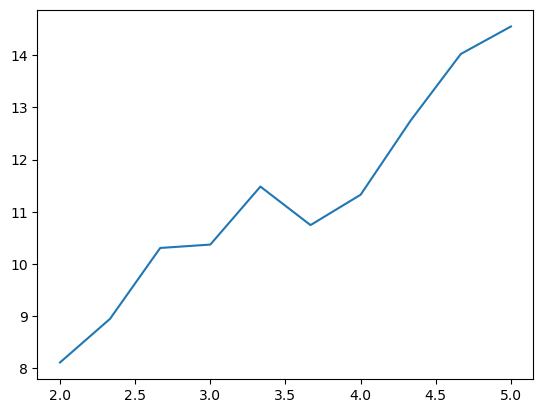

In [83]:
plt.plot(np.log10(N_list), np.log10(full_var_vals))
plt.show()

In [107]:
x = np.log10(N_list)
y = np.log10(full_var_vals)

In [108]:
ln_mu = (y.mean()*(x**2).mean() - (x*y).mean()*x.mean())/((x**2).mean() - x.mean()**2)
ln_mu

4.40206460801157

In [110]:
nu = ((x*y).mean() - y.mean()*x.mean())/((x**2).mean() - x.mean()**2)
nu

1.9604180230175632

$$log_{10}(<\Delta R^2_N>) \approx  log_{10}\mu + \nu log_{10}(N)$$

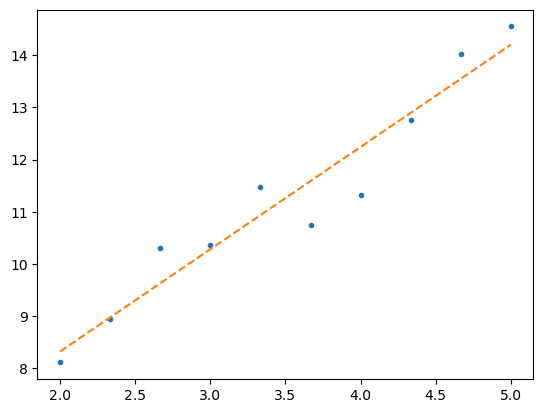

In [112]:
plt.plot(np.log10(N_list), np.log10(full_var_vals),'.')
plt.plot(np.log10(N_list), ln_mu + nu*np.log10(N_list),'--')

plt.show()

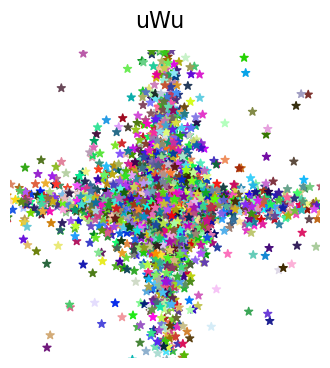

In [28]:
plt.figure(figsize=(4,4))
plt.suptitle('uWu', fontsize=16)
plt.scatter(curr_vals[0,:],curr_vals[1,:],marker='*', c=np.random.rand(M,3))
plt.xlim(-ax_lim,ax_lim)
plt.ylim(-ax_lim,ax_lim)
plt.axis('off')
plt.show()